In [1]:
%pylab inline
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
points = np.loadtxt("data.csv", delimiter=",").astype('float32')
points.dtype, points.shape

(dtype('float32'), (100, 2))

In [7]:
from gradient import gradient_descent_runner, loss

In [8]:
learning_rate = 0.00005
initial_b = 100 # initial y-intercept guess
initial_m = -8 # initial slope guess
num_iterations = 1000000

In [33]:
b_history, m_history = gradient_descent_runner(points, 
                                               initial_b, 
                                               initial_m, 
                                               learning_rate, 
                                               num_iterations)

In [26]:
_b = np.linspace(-1000, 1000, 250)
_m = np.linspace(-20, 20, 250)
mesh_b, mesh_m = meshgrid(_b, _m)
mesh_loss = loss(mesh_b, mesh_m, points)
mesh_loss/=20000

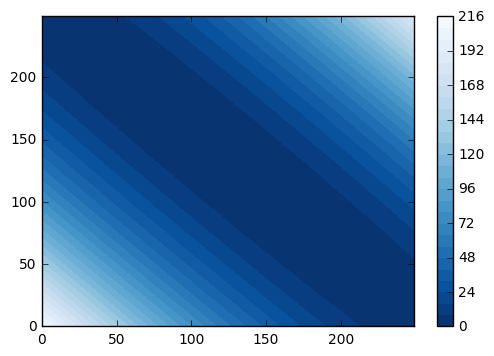

In [11]:
plt.contourf(mesh_loss, 30, cmap=plt.cm.Blues_r)
plt.colorbar()

In [12]:
from vispy import app, scene
from vispy.util.filter import gaussian_filter
from vispy.visuals.transforms import STTransform
%gui qt

canvas = scene.SceneCanvas(keys='interactive', bgcolor='k')
view = canvas.central_widget.add_view()
view.camera = scene.TurntableCamera(up='z', fov=60)

p_mesh_loss = scene.visuals.SurfacePlot(x=_b, y=_m, z=mesh_loss, color=(0.3, 0.3, 1, 0.7))
# p_mesh_loss.transform = scene.transforms.MatrixTransform()
# p_mesh_loss.transform.scale([1/500., 1/500., 1/500.])
s_optimizer = scene.visuals.Sphere(radius=2, color=(1,0,0,1))



# z = mesh_loss[1,0] - mesh_loss[0,0]
s_optimizer.transform = STTransform(translate=[10, 0, 0])


# z = np.random.normal(size=(250, 250), scale=200)
# z[100, 100] += 50000
# z = gaussian_filter(z, (10, 10))
# p1 = scene.visuals.SurfacePlot(z=z, color=(0.3, 0.3, 1, 1))
# p1.transform = scene.transforms.MatrixTransform()
# p1.transform.scale([1/249., 1/249., 1/249.])

axis = scene.visuals.XYZAxis(parent=view.scene)
view.add(p_mesh_loss)
view.add(s_optimizer)
canvas.show()

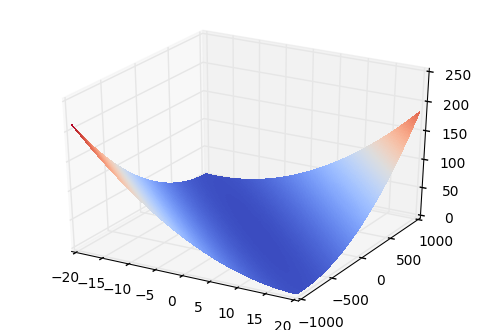

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(mesh_m, mesh_b, mesh_loss, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [13]:
mesh_loss.min(), np.unravel_index(mesh_loss.argmin(), mesh_loss.shape)

(0.0056960917169369728, (133, 125))

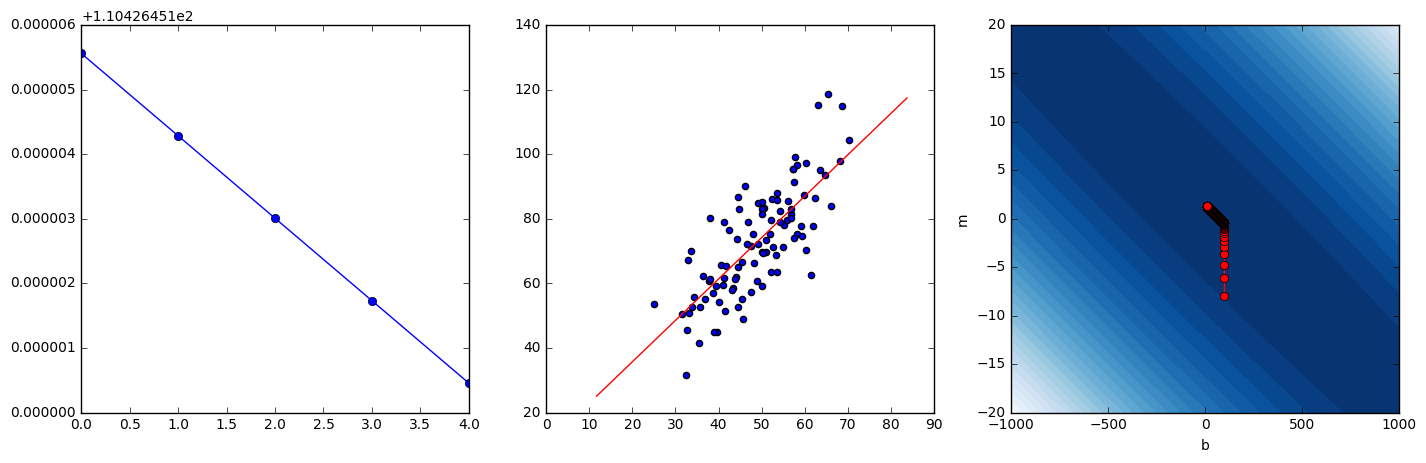

In [14]:
@interact(i=(0,num_iterations,1))
def view(i=0):
    fig, ax = plt.subplots(1,3,figsize=(17,5))
    m, b = m_history[i], b_history[i]
    x = np.linspace(min(points[:,0])-points[:,0].var()/7, max(points[:,0])+points[:,0].var()/7, 1000)
    error_history = loss(b_history[:i+1], m_history[:i+1], points)
    ax[0].plot(error_history[-5:],'-o')
    
    ax[1].scatter(points[:,0], points[:,1])
    ax[1].plot(x, m*x + b, 'r-')
    
    ax[2].plot(b_history[:i+1], m_history[:i+1],'-ro')
    ax[2].set_xlabel('b')
    ax[2].set_ylabel('m')
    ax[2].contourf(mesh_b, mesh_m, mesh_loss, 30, cmap=plt.cm.Blues_r)

Notice the scale of the above figures, especiallhy the last one. 